In [8]:
# import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(cifar_images, cifar_labels), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the input images
cifar_images = cifar_images / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
cifar_labels = tf.keras.utils.to_categorical(cifar_labels, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [12]:
# Design a new CNN models with the following features
'''
    a convolutional layer with ReLU activation and 32 filters (filter size (3,3)) and a padding='same',
    a Batch Normalization layer
    a convolutional layer with ReLU activation and 32 filters (filter size (3,3)) and a padding='same'
    a Batch Normalization layer,
    a (2,2) Max Pooling layer
    a Dropout layer with a dropping probability=0.2

    a convolutional layer with ReLU activation and 64 filters (filter size (3,3)) and a padding='same',
    a Batch Normalization layer
    a convolutional layer with ReLU activation and 64 filters (filter size (3,3)) and a padding='same'
    a Batch Normalization layer,
    a (2,2) Max Pooling layer
    a Dropout layer with a dropping probability=0.3

    a convolutional layer with ReLU activation and 128 filters (filter size (3,3)) and a padding='same',
    a Batch Normalization layer
    a convolutional layer with ReLU activation and 128 filters (filter size (3,3)) and a padding='same'
    a Batch Normalization layer,
    a (2,2) Max Pooling layer
    a Dropout layer with a dropping probability=0.4

    a flattening layer to convert the 2D feature maps into a 1D vector.
    a Dense layers with 128 nodes and a relu activation function.
    a Batch Normalization layer
    a Dropout layer with a dropping probability=0.5
    a Dense layer that lead to the final classification output. The last layer should have 10 units with a softmax activation function, corresponding to the CIFAR-10 classes.
'''
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
'''
Use an optimizer and loss function suitable for a classification problem
(categorical cross-entropy is recommended), and include accuracy as a metric.
'''
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data augmentation.
# Use imported 'ImageDataGenerator'. Examine the following parameters to acheive
# the best performance (at least 84% test accuracy)
# 'rotation_range', 'width_shift_range', 'height_shift_range',
# 'horizontal_flip', and 'zoom_range'.
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2 
)

# Apply defined datagen to cifar images
# Hint: check the materials of Tuesday, March 12.
datagen.fit(cifar_images)

# Train the model for at least 10 epochs.
history = model.fit(datagen.flow(cifar_images, cifar_labels, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 90ms/step - accuracy: 0.3133 - loss: 2.1142 - val_accuracy: 0.5105 - val_loss: 1.3764
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.5138 - loss: 1.3551 - val_accuracy: 0.5613 - val_loss: 1.3150
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5978 - loss: 1.1332 - val_accuracy: 0.6882 - val_loss: 0.8900
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.6460 - loss: 1.0162 - val_accuracy: 0.6457 - val_loss: 1.0490
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.6721 - loss: 0.9364 - val_accuracy: 0.6367 - val_loss: 1.1493
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.6950 - loss: 0.8857 - val_accuracy: 0.7372 - val_loss: 0.7763
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.7187 - loss: 0.8224 - val_accuracy: 0.7062 - val_loss: 0.8758
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.7275 - loss: 0.7

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - 11ms/step - accuracy: 0.8574 - loss: 0.4429

Test accuracy: 0.8574000000953674


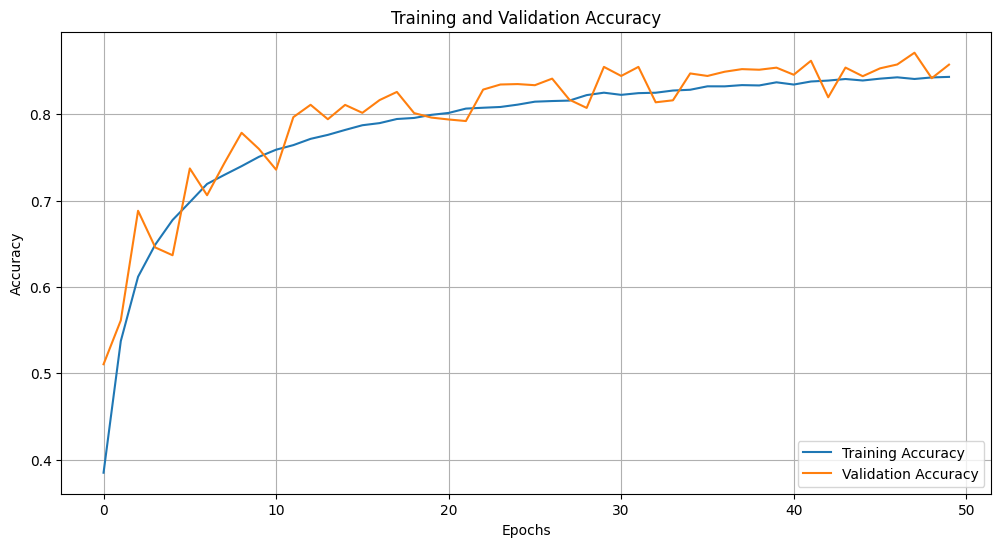

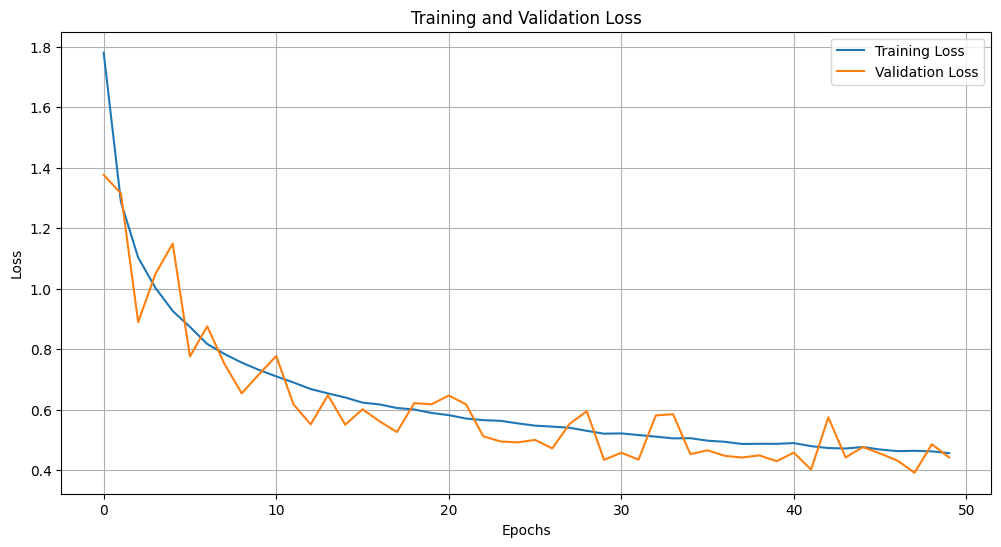

In [14]:

# Plot training & validation accuracy values for all different models (In total,  )
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()